<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/A4_Chap_13HWa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

13.4

In [3]:
data = pd.read_csv('/content/drive/MyDrive/SQC Q13.4.csv')
data

,A,B,C,Replicate
0,-1.0,-1.0,-1.0,221.0
1,1.0,-1.0,-1.0,325.0
2,-1.0,1.0,-1.0,354.0
3,1.0,1.0,-1.0,552.0
4,-1.0,-1.0,1.0,440.0
5,1.0,-1.0,1.0,406.0
6,-1.0,1.0,1.0,605.0
7,1.0,1.0,1.0,392.0
8,-1.0,-1.0,-1.0,311.0
9,1.0,-1.0,-1.0,435.0


In [4]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          16 non-null     float64
 1   B          16 non-null     float64
 2   C          16 non-null     float64
 3   Replicate  16 non-null     float64
dtypes: float64(4)
memory usage: 672.0 bytes


In [6]:
modelA = ols('Replicate ~ A + B + C + A:B + A:C + B:C + A:B:C', data=df).fit()
aov_table = sm.stats.anova_lm(modelA, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
A,1332.25,1.0,0.541015,0.483017
B,28392.25,1.0,11.529848,0.009422
C,20592.25,1.0,8.362335,0.020144
A:B,506.25,1.0,0.205584,0.662297
A:C,56882.25,1.0,23.099391,0.001345
B:C,2352.25,1.0,0.955228,0.357017
A:B:C,4830.25,1.0,1.961523,0.198923
Residual,19700.00,8.0,NaN,NaN


In [7]:
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:              Replicate   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Tue, 10 Oct 2023   Prob (F-statistic):            0.00790
Time:                        14:56:13   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    413.1250     12.406     33.301      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Q1)  Cutting tools B and C have the biggest effect on tool life.
Q2)  The combination of cutting tools in run 1 combined for the longest tool life.
Q3)  The best combination for cutting speed and angle is when the cutting speed is low and the cutting angle is high.

13.6

In [8]:
data1 = pd.read_csv('/content/drive/MyDrive/SQC Q13.6.csv')
data1

,A,B,C,D,Replicate
0,-1,-1,-1,-1,188
1,1,-1,-1,-1,172
2,-1,1,-1,-1,179
3,1,1,-1,-1,185
4,-1,-1,1,-1,175
5,1,-1,1,-1,183
6,-1,1,1,-1,190
7,1,1,1,-1,175
8,-1,-1,-1,1,200
9,1,-1,-1,1,170


In [9]:
df1=data1 #df means data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A          32 non-null     int64
 1   B          32 non-null     int64
 2   C          32 non-null     int64
 3   D          32 non-null     int64
 4   Replicate  32 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB


In [16]:
modelB = ols('Replicate ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D + A:B:C + A:B:D + A:C:D + B:C:D + A:B:C:D', data=df1).fit()
aov_table = sm.stats.anova_lm(modelA, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
A,657.03125,1.0,22.729730,0.000210
B,13.78125,1.0,0.476757,0.499790
C,57.78125,1.0,1.998919,0.176574
D,124.03125,1.0,4.290811,0.054847
A:B,132.03125,1.0,4.567568,0.048369
A:C,3.78125,1.0,0.130811,0.722325
A:D,38.28125,1.0,1.324324,0.266726
B:C,2.53125,1.0,0.087568,0.771099
B:D,0.28125,1.0,0.009730,0.922650
C:D,22.78125,1.0,0.788108,0.387824


In [20]:
print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:              Replicate   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.471
Date:                Tue, 10 Oct 2023   Prob (F-statistic):            0.00917
Time:                        15:25:49   Log-Likelihood:                -88.141
No. Observations:                  32   AIC:                             208.3
Df Residuals:                      16   BIC:                             231.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    182.7813      0.950    192.314      0.0

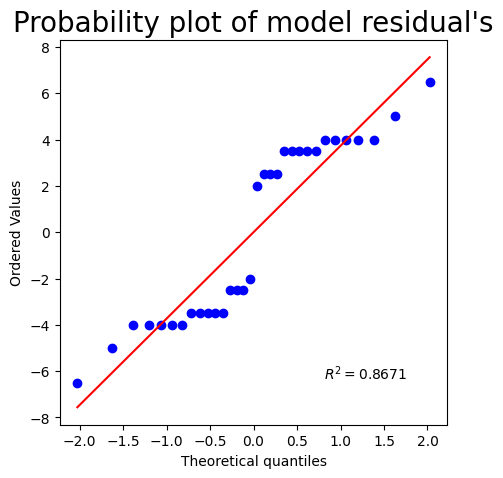

In [22]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(modelB.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

Looking at the model summary in the coef row we can see that nothing has a big effect on the overall score of the soda. Also looking at the normality chart we can see that this does follow normailty showing us that none of the factor combinations greatly affect the overall of the soda.